In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
parcellations_df = pd.read_csv("Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv")
# add column for brain hemisphere. If LH is in ROI Name, then it is LH, otherwise it is RH
parcellations_df['Hemisphere'] = np.where(parcellations_df['ROI Name'].str.contains("LH"), "LH", "RH")
# network mapping
mapping = {
    "Vis" : "VIS",
    "SomMot" : "MOT",
    "DorsAttn" : "DAN",
    "SalVentAttn" : "VAN",
    "Limbic" : "LBN",
    "Cont" : "FPN",
    "Default" : "DMN"
}
mapping_order = {}
for i, k in enumerate(mapping.keys()):
    mapping_order[mapping[k]] = i
# check whether the network name is in the ROI Name, if so, then add the network name to the Network column
parcellations_df['Network'] = ""
for network in mapping.keys():
    parcellations_df['Network'] = np.where(parcellations_df['ROI Name'].str.contains(network), mapping[network], parcellations_df['Network'])

parcellations_df.sort_values(by=['Network', "Hemisphere"], key=lambda x: x.map(mapping_order), inplace=True)
parcellations_df.reset_index(inplace=True)
parcellations_df

,index,ROI Label,ROI Name,R,A,S,Hemisphere,Network
0,0,1,7Networks_LH_Vis_1,-32,-42,-20,LH,VIS
1,1,2,7Networks_LH_Vis_2,-30,-32,-18,LH,VIS
2,2,3,7Networks_LH_Vis_3,-36,-62,-16,LH,VIS
3,3,4,7Networks_LH_Vis_4,-24,-54,-8,LH,VIS
4,4,5,7Networks_LH_Vis_5,-24,-72,-10,LH,VIS
...,...,...,...,...,...,...,...,...
395,395,396,7Networks_RH_Default_pCunPCC_5,4,-64,32,RH,DMN
396,396,397,7Networks_RH_Default_pCunPCC_6,6,-38,34,RH,DMN
397,397,398,7Networks_RH_Default_pCunPCC_7,4,-20,36,RH,DMN
398,398,399,7Networks_RH_Default_pCunPCC_8,10,-52,36,RH,DMN


In [3]:
networks_indices = parcellations_df.groupby('Network').groups
networks_ids_for_plot = {}
for k, v in mapping_order.items():
    networks_ids_for_plot[k] = [networks_indices[k][0], networks_indices[k][-1]]
networks_ids_for_plot

{'VIS': [0, 60],
 'MOT': [61, 137],
 'DAN': [138, 183],
 'VAN': [184, 230],
 'LBN': [231, 256],
 'FPN': [257, 308],
 'DMN': [309, 399]}

In [4]:
att_weights = np.load("../code/attention_weights.npy")
att_weights.shape

(608, 400, 400)

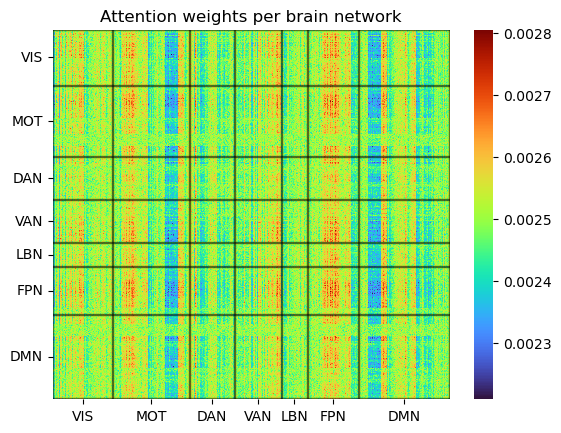

In [5]:
sns.heatmap(att_weights.mean(axis=0), cmap="turbo")
# add xticks in the middle of networks indicated by network_ids_for_plot
xticks = []
for k, v in networks_ids_for_plot.items():
    xticks.append(np.mean(v))
yticks = xticks
# add network name on the xticks
xticklabels = list(networks_ids_for_plot.keys())
yticklabels = xticklabels
# add vlines to separate networks
lw = 1
alpha = 0.5
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)

plt.xticks(ticks=xticks, labels=xticklabels, rotation=0)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
plt.title("Attention weights per brain network")
plt.show()

In [6]:
def network_mean(matrix, network_ids=networks_ids_for_plot):
    mean_matrix = np.zeros_like(matrix)
    for k1, v1 in network_ids.items():
        for k2, v2 in network_ids.items():
            mean_matrix[v1[0]:v1[1]+1, v2[0]:v2[1]+1] = matrix[v1[0]:v1[1]+1, v2[0]:v2[1]+1].flatten().mean()
    return mean_matrix

Text(0.5, 1.0, 'Attention weights per brain network')

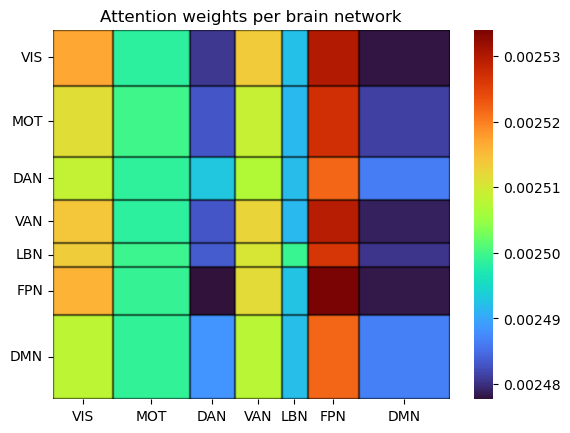

In [7]:
att_weights_mean = network_mean(att_weights.mean(axis=0))
        
sns.heatmap(att_weights_mean, cmap="turbo")
plt.xticks(ticks=xticks, labels=xticklabels, rotation=0)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)

plt.title("Attention weights per brain network")

In [8]:
attributions = np.load("../code/attributions.npy")
    
# attributions_cmap = "icefire"
attributions_cmap = "vlag"

In [9]:
attributions.shape

(9, 32, 400, 400)

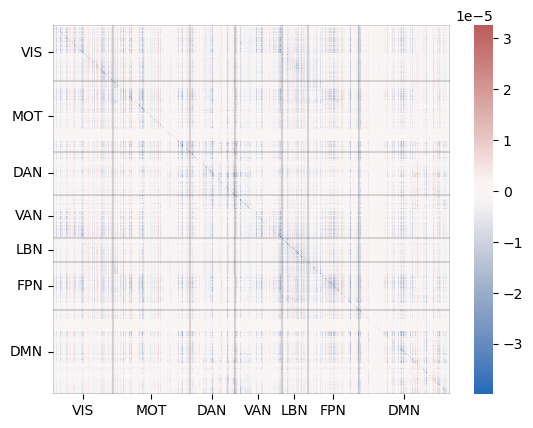

In [10]:
lw = 0.5
alpha = 0.2
plot = attributions[0]
sns.heatmap(plot.mean(axis=0), cmap=attributions_cmap, center=0)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=0)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)


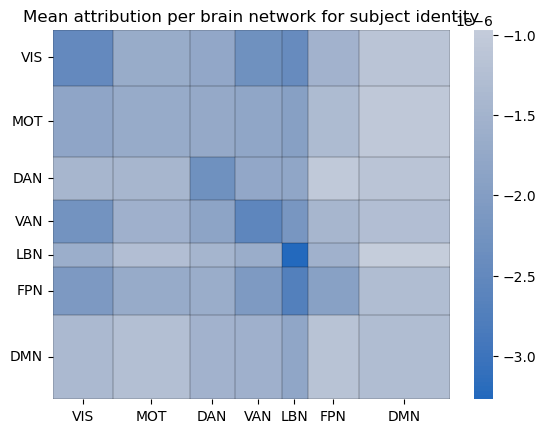

In [11]:
plot = attributions[0].mean(axis=0) 
plot = network_mean(plot)

sns.heatmap(plot, cmap=attributions_cmap, center=0)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=0)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
plt.title("Mean attribution per brain network for subject identity")
plt.show()


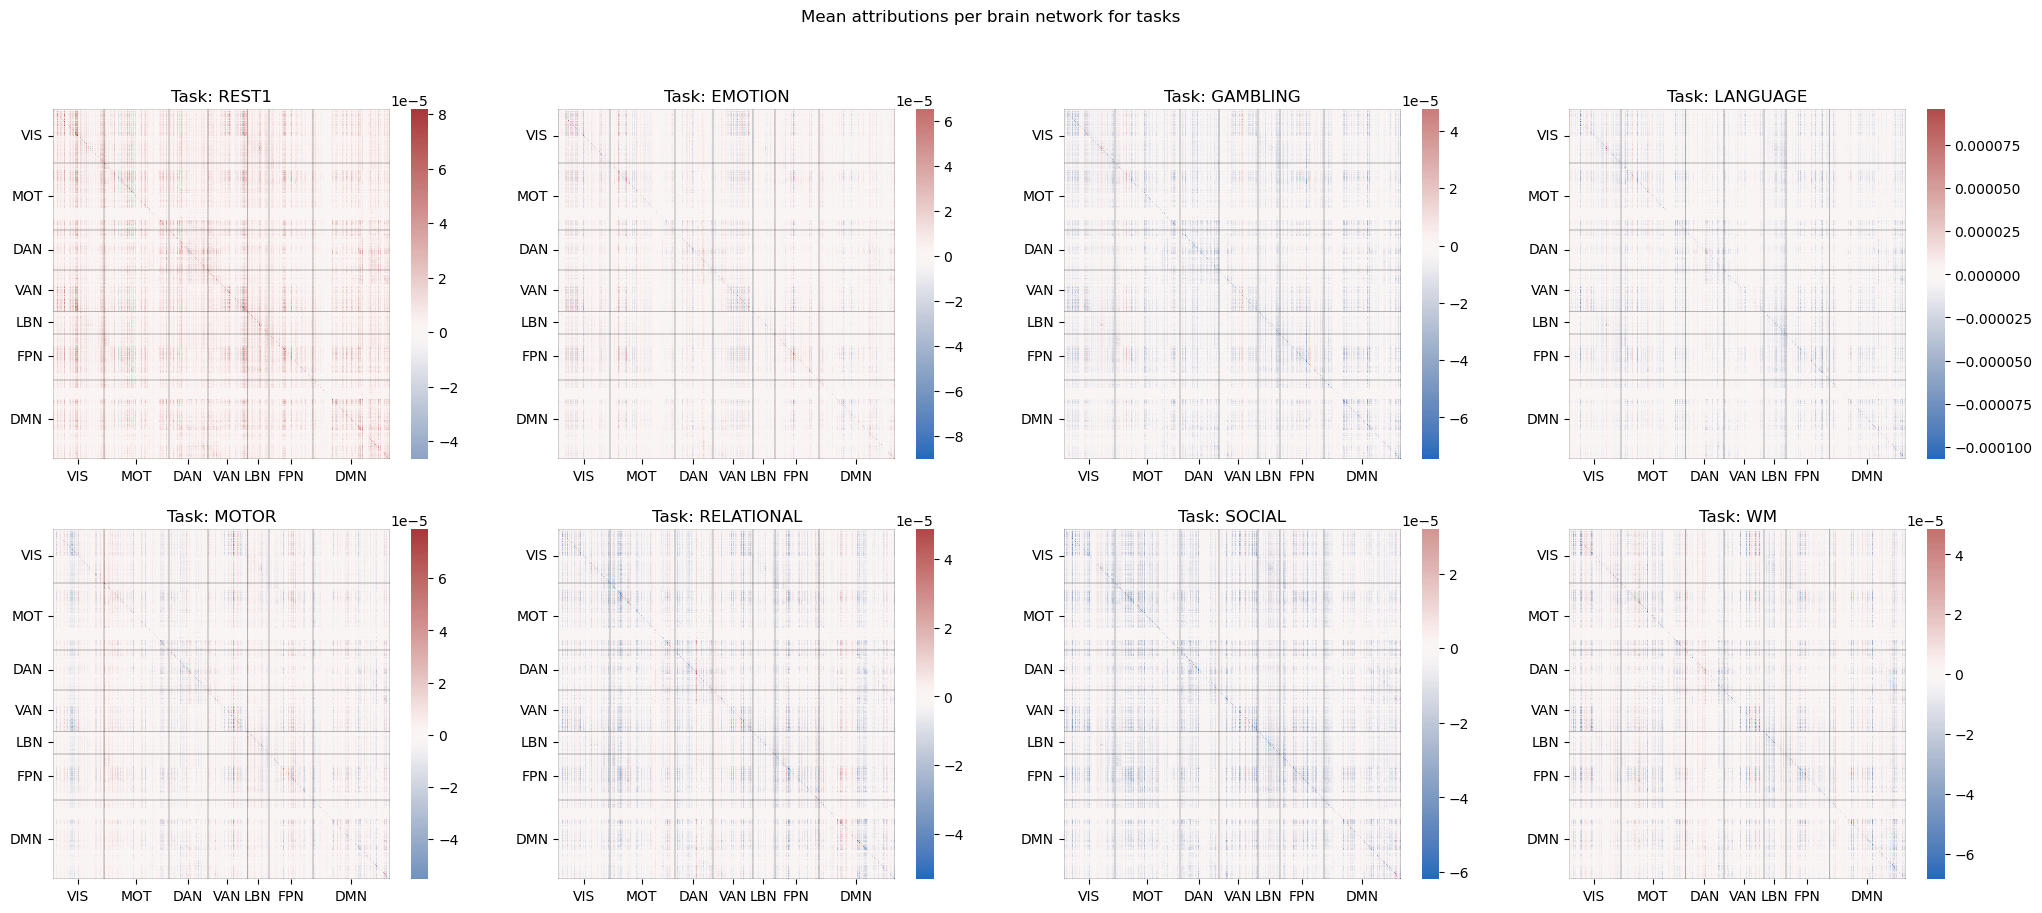

In [12]:
task_labels = [
            "REST1",
            "EMOTION",
            "GAMBLING",
            "LANGUAGE",
            "MOTOR",
            "RELATIONAL",
            "SOCIAL",
            "WM",
        ]

fig, axs = plt.subplots(2, 4, figsize=(25, 10))
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    sns.heatmap(attributions[i+1].mean(axis=0), cmap=attributions_cmap, center=0,ax=ax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=0)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")
plt.suptitle(f"Mean attributions per brain network for tasks")
plt.show()

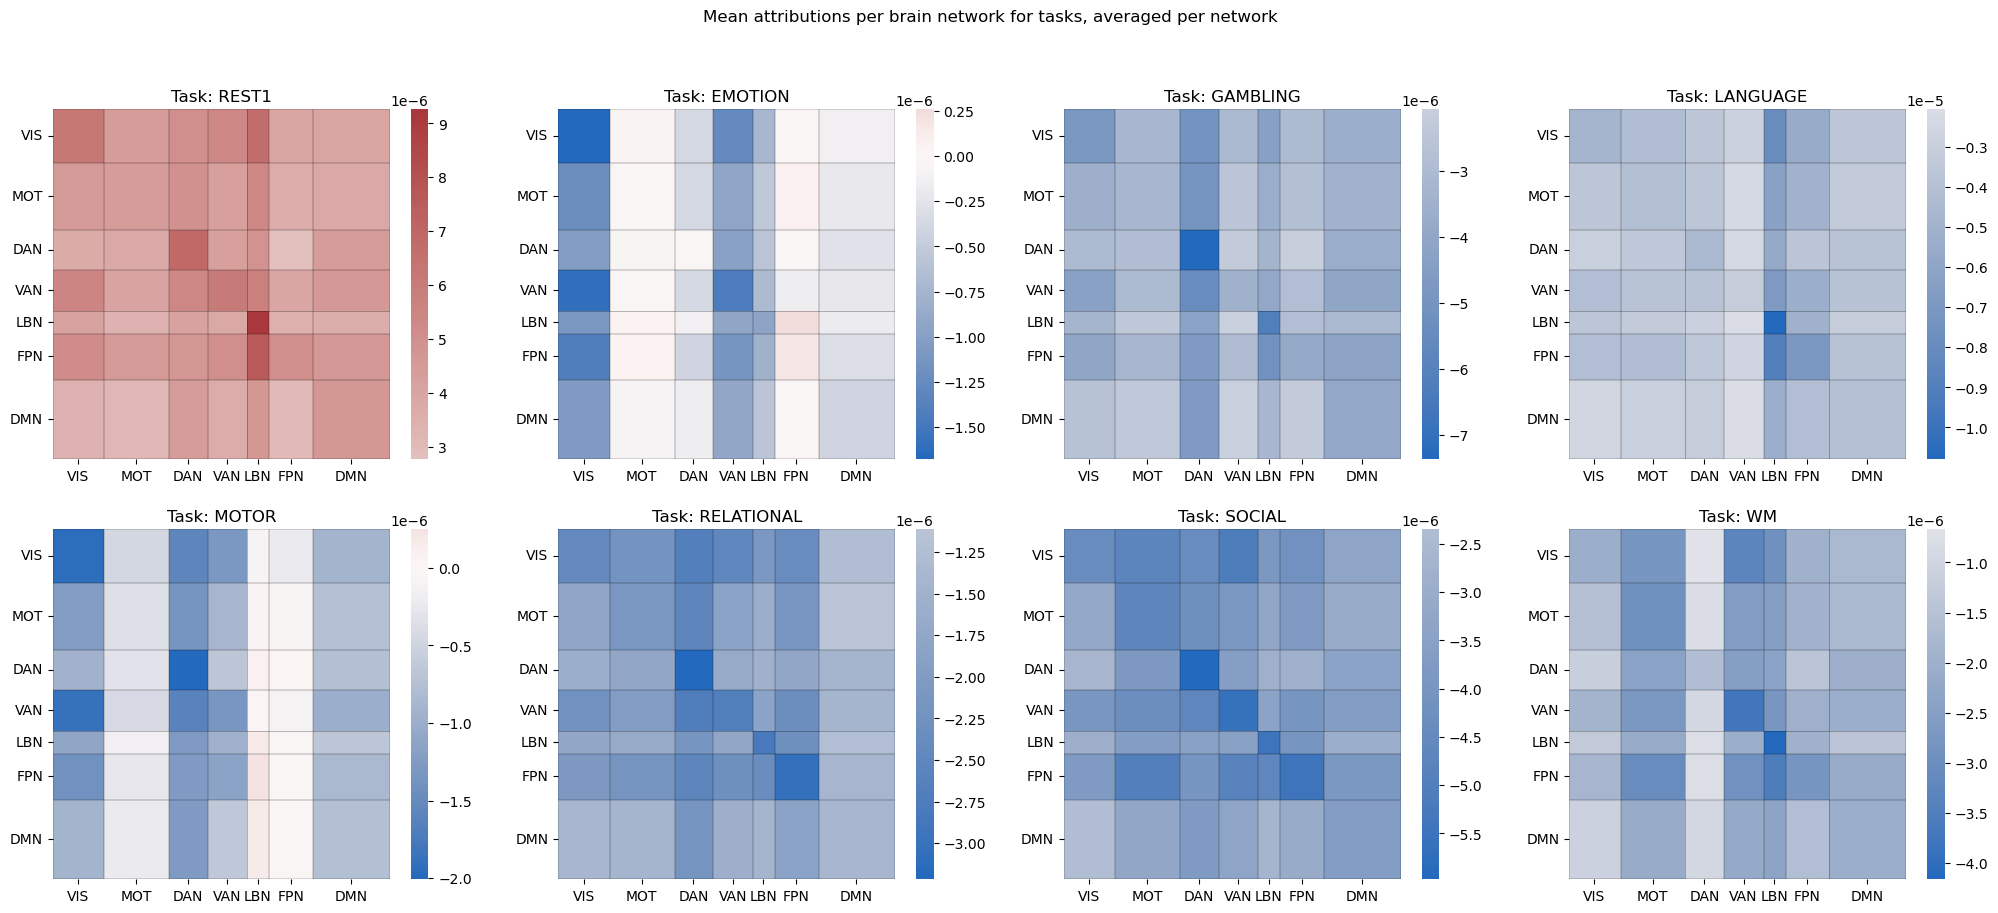

In [13]:
task_labels = [
            "REST1",
            "EMOTION",
            "GAMBLING",
            "LANGUAGE",
            "MOTOR",
            "RELATIONAL",
            "SOCIAL",
            "WM",
        ]

fig, axs = plt.subplots(2, 4, figsize=(25, 10))
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    window_mean = network_mean(attributions[i+1].mean(axis=0))
    sns.heatmap(window_mean, cmap=attributions_cmap, center=0,ax=ax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=0)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")
plt.suptitle(f"Mean attributions per brain network for tasks, averaged per network")
plt.show()

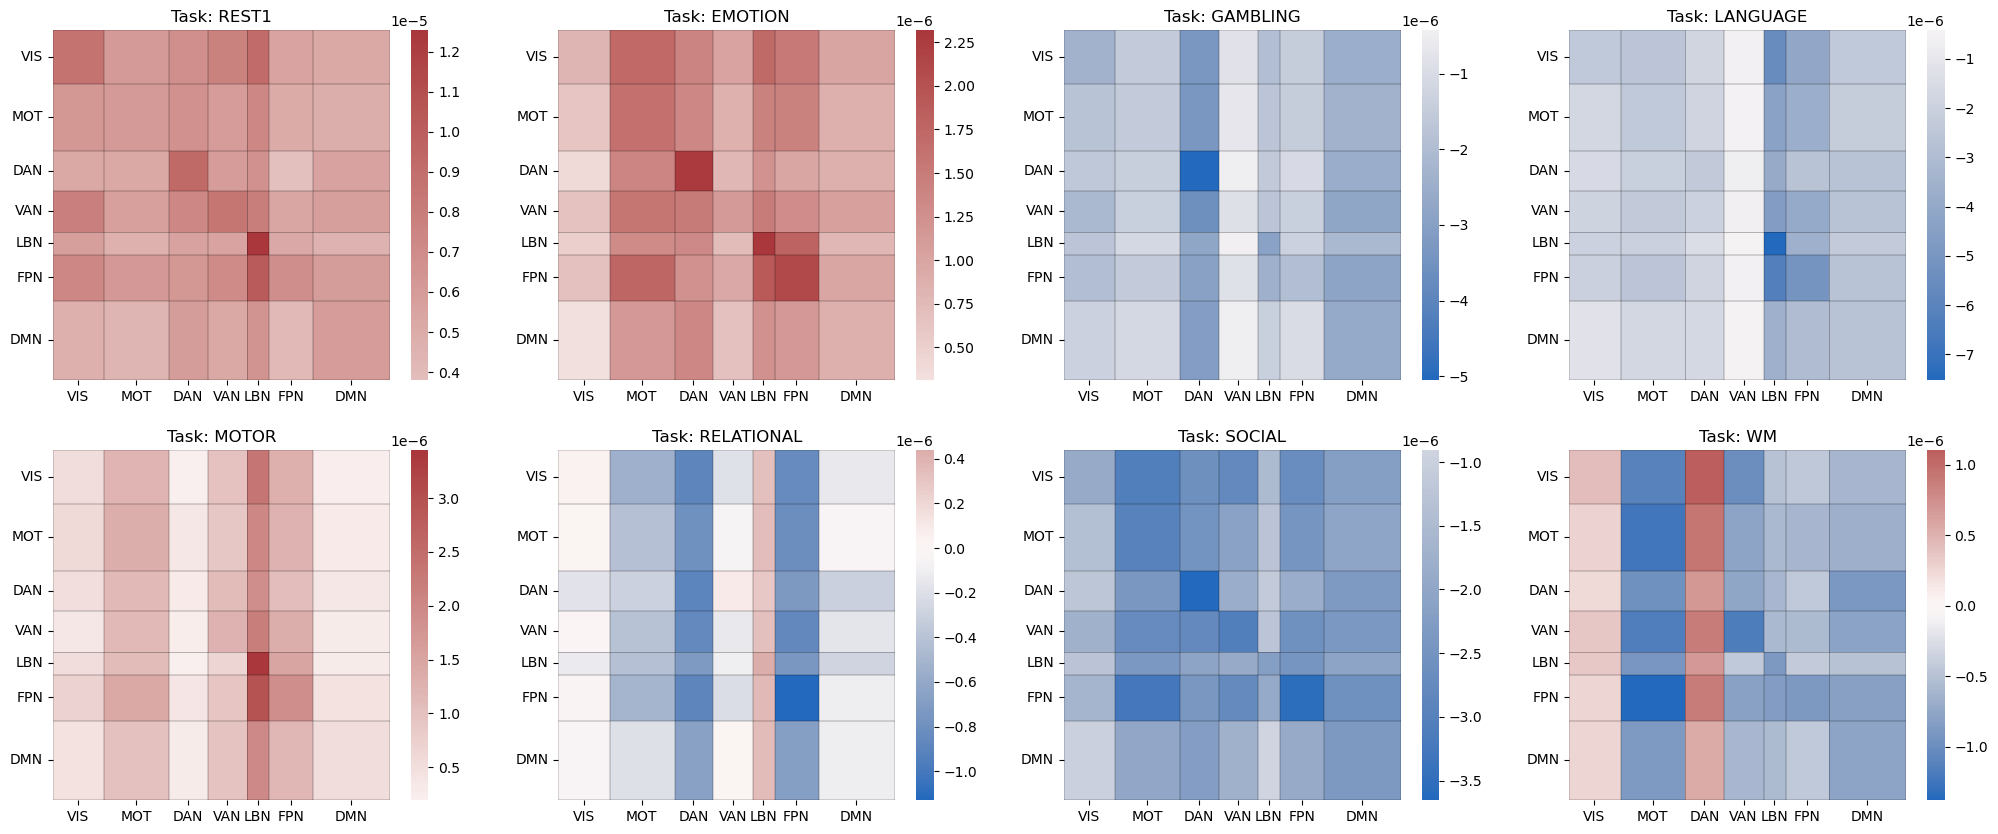

In [14]:
# subtract SI attributions from task attributions
task_attributions = attributions[1:]
subtraction = task_attributions - attributions[0]
# plot subtractions
fig, axs = plt.subplots(2, 4, figsize=(25, 10))
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    window_mean = network_mean(subtraction[i].mean(axis=0))
    sns.heatmap(window_mean, cmap=attributions_cmap, center=0,ax=ax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=0)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")